# Загрузка библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os

2024-12-17 20:47:14.097369: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Загрузка модели

In [2]:

model = tf.keras.models.load_model('/Users/tim/Downloads/256 на 256/small_model.h5')

model.summary()
# Compile the new model
model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,061 (258.05 KB)

 Trainable params: 66,059 (258.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Проверка

### Загрузка фотографий для проверки

In [3]:
image_dir = 'pics_for_check'

# Создадим таблицу с информацией о фотографиях
all_files = os.listdir(image_dir)
image_files = [f for f in all_files if f.endswith('.jpg') or f.endswith('.jpeg')]
labels = [os.path.splitext(f)[0] for f in image_files]
image_paths = [os.path.join(image_dir, image_file) for image_file in image_files]
df = pd.DataFrame({
    'image': image_paths,
    'label': labels
})

df

,image,label
0,pics_for_check/sandstorm.jpeg,sandstorm
1,pics_for_check/dew.jpeg,dew
2,pics_for_check/hail.jpeg,hail
3,pics_for_check/fogsmog.jpeg,fogsmog
4,pics_for_check/frost.jpeg,frost
5,pics_for_check/rain.jpeg,rain
6,pics_for_check/rainbow.jpeg,rainbow
7,pics_for_check/glaze.jpeg,glaze
8,pics_for_check/rime.jpeg,rime
9,pics_for_check/lightning.jpeg,lightning


### Использование модели и вывод изображений

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


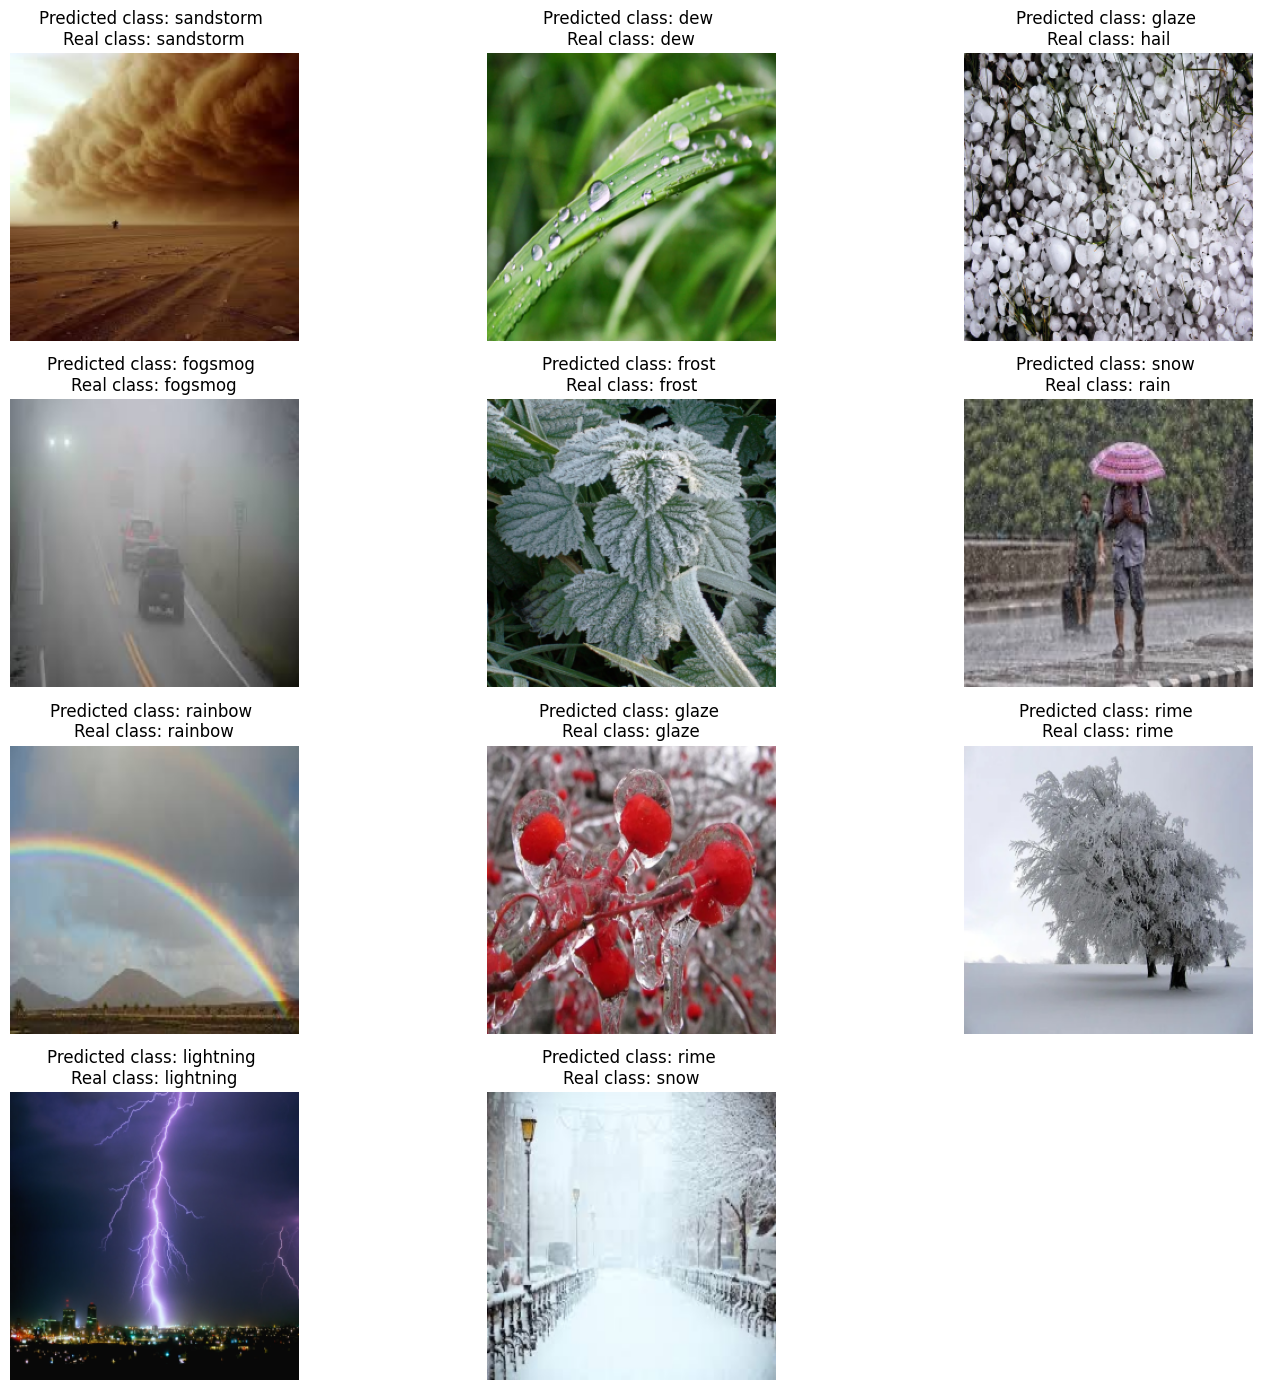

In [4]:
# Значения для дальнейшей расшифровки 
label_map = {'rainbow': 0, 'frost': 1, 'lightning': 2, 'rime': 3, 'rain': 4,
  'fogsmog': 5, 'snow': 6, 'hail': 7, 'dew': 8, 'sandstorm': 9,
  'glaze': 10}

# Расшифровка
index_to_label = {v: k for k, v in label_map.items()}

fig = plt.figure(figsize=(15, 14))
for index, row in df.iterrows():
    
    ax = plt.subplot(4, 3, index + 1)
    image = cv2.imread(row['image']) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)
    plt.imshow(image)
    ax.axis('off')
    
    image_batch = np.expand_dims(image, axis=0)  
    
    # Предикт
    y_pred = model.predict(image_batch, verbose=1)
    y_pred_classes = np.argmax(y_pred, axis=1)
    predicted_label = index_to_label[y_pred_classes[0]]
    
    ax.set_title(f'Predicted class: {predicted_label} \nReal class: {row['label']}')
fig.tight_layout()
plt.show()